# Instalar dependências

In [114]:
%pip install pandas; matplotlib; boto3; jinja2

Note: you may need to restart the kernel to use updated packages.


# Carregar pacotes

In [115]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
import boto3

pd.set_option('display.max_columns', None)

# Carregar dataset

In [116]:
base_path = Path('./data/')
csv_filename = 'Sample - Superstore.csv'
db_name = 'superstore.db'

csv_path = base_path / csv_filename 
db_path = base_path / db_name

df = pd.read_csv(csv_path, encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Exploração inicial dos dados

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [118]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Limpeza e transformação dos dados

In [119]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [120]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Average Ticket'] = df['Sales'] / df['Quantity']
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Cost'] = df['Sales'] - df['Profit']
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [121]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Average Ticket', 'Profit Margin', 'Cost', 'Order Month', 'Order Year'],
      dtype='object')

In [122]:
df.set_index('Row ID', inplace = True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Average Ticket,Profit Margin,Cost,Order Month,Order Year
Row ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,0.1600,220.0464,11,2016
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,0.3000,512.3580,11,2016
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,0.4700,7.7486,6,2016
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-0.4000,1340.6085,10,2015
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,0.1125,19.8516,10,2015


# Armazenamento

In [123]:
conn = sqlite3.connect(db_path)

df.to_sql(
    name = 'sales',
    con = conn,
    if_exists = 'replace',
    index = False
)

conn.close()

In [124]:
conn = sqlite3.connect(db_path)

df_db = pd.read_sql('SELECT * FROM SALES LIMIT 5', conn)
conn.close()

df_db.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Average Ticket,Profit Margin,Cost,Order Month,Order Year
0,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,0.1600,220.0464,11,2016
1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,0.3000,512.3580,11,2016
2,CA-2016-138688,2016-06-12 00:00:00,2016-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,0.4700,7.7486,6,2016
3,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,-0.4000,1340.6085,10,2015
4,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,0.1125,19.8516,10,2015


In [125]:
filename_transformed = 'superstore_transformed.csv'
new_csv_path = base_path / filename_transformed

df.to_csv(new_csv_path)

In [ ]:
s3 = boto3.client(
    's3',
    region_name='sa-east-1',
    aws_access_key_id='AWS_ID',
    aws_secret_access_key='AWS_SECRET'
)

bucket_name = 'superstore-lucas-2025'
s3_filename = 'superstore.csv'

s3.upload_file(
    new_csv_path,
    bucket_name,
    s3_filename
    )

# Receitas por Categoria

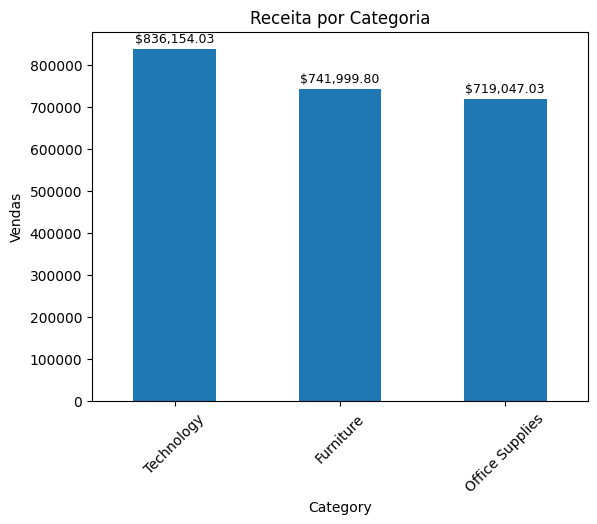

In [127]:
category = df.groupby('Category')['Sales'].sum().sort_values(ascending = False)
ax = category.plot(kind='bar')
plt.title('Receita por Categoria')
plt.ylabel('Vendas')

for i, v in enumerate(category):
    ax.text(i, v + (v * 0.01),
            f'${v:,.2f}',
            ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.show()

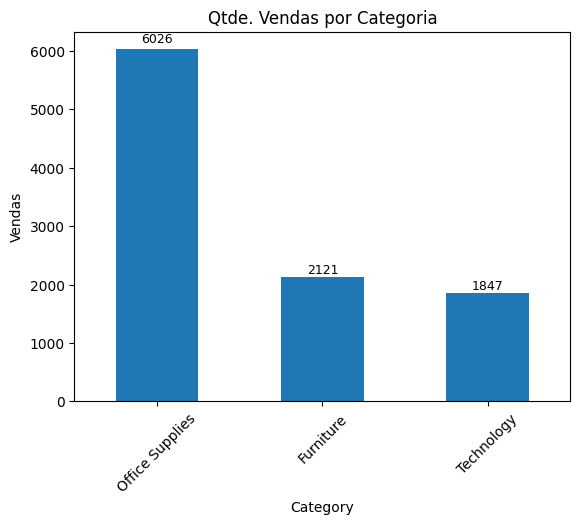

In [128]:
sales_count = df.groupby('Category')['Sales'].count().sort_values(ascending=False)
ax = sales_count.plot(kind='bar')
plt.title('Qtde. Vendas por Categoria')
plt.ylabel('Vendas')

for i, v in enumerate(sales_count):
    ax.text(i, v + (v * 0.01),
            f'{v}',
            ha='center', va='bottom', fontsize=9)
    
plt.xticks(rotation=45)
plt.show()


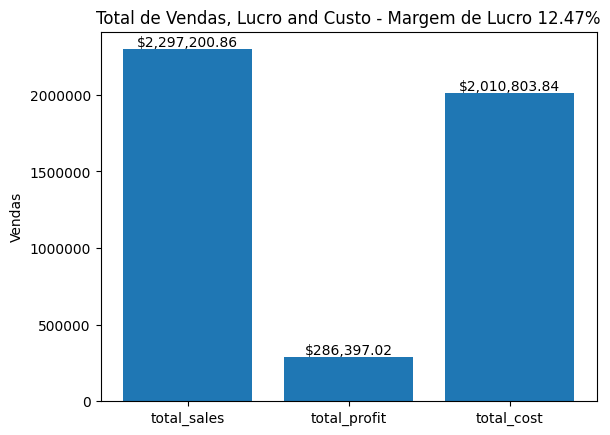

In [129]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_cost = df['Cost'].sum()

total_profit_margin = (total_profit / total_sales)

bars = plt.bar(
    ['total_sales', 'total_profit', 'total_cost'],
    [total_sales, total_profit, total_cost])

labels = [f'${v:,.2f}' for v in [total_sales, total_profit, total_cost]]

plt.title(f'Total de Vendas, Lucro and Custo - Margem de Lucro {total_profit_margin:.2%}')
plt.bar_label(bars, labels=labels)
plt.ylabel('Vendas')

ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y')

plt.show()

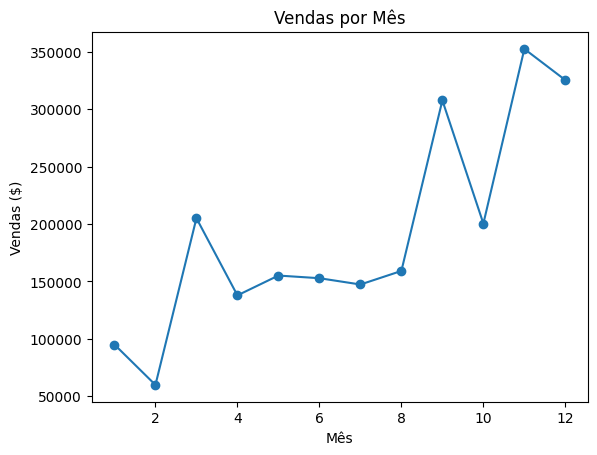

In [130]:
sales_month = df.groupby('Order Month')['Sales'].sum()
ax = sales_month.plot(marker='o')
plt.title('Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Vendas ($)')
plt.show()


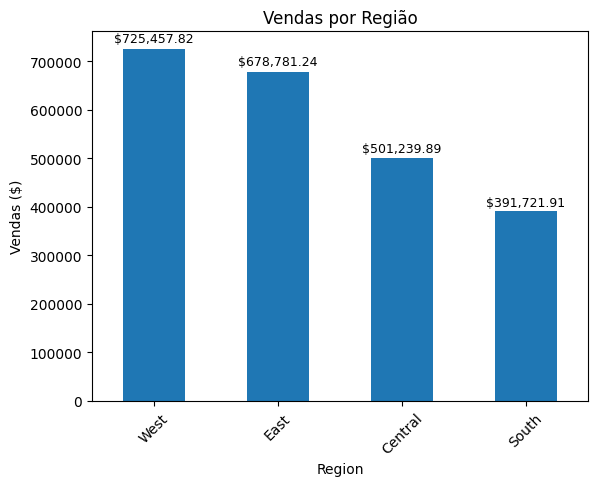

In [131]:
sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
ax = sales_region.plot(kind='bar')
plt.title('Vendas por Região')
plt.ylabel('Vendas ($)')

for i, v in enumerate(sales_region):
    ax.text(i, v + (v * 0.01),
            f'${v:,.2f}',
            ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.show()

# Top 5 vendas por estado

In [133]:
state_sales = df.pivot_table(index='State', values='Sales', aggfunc='sum').sort_values(by='Sales', ascending=False)
state_sales.head().style.format({'Sales': '$ {:,.2f}'})

,Sales
State,
California,"$ 457,687.63"
New York,"$ 310,876.27"
Texas,"$ 170,188.05"
Washington,"$ 138,641.27"
Pennsylvania,"$ 116,511.91"
